<a href="https://colab.research.google.com/github/PlayfulDevBit/Imageclassification/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

Loading MobileNetV2 model...
Model loaded.
Fetching image from: https://picsum.photos/400/400
Displaying the fetched image...


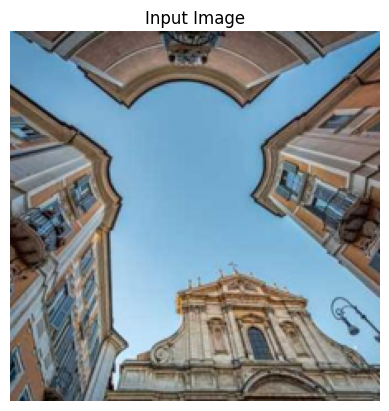


Classifying the image...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Top 3 Predictions:
1: palace (34.98%)
2: monastery (30.88%)
3: dome (15.97%)


In [3]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from PIL import Image
import numpy as np
import requests # To fetch image from URL
from io import BytesIO # To handle image bytes in memory
import matplotlib.pyplot as plt # To display the image

# --- 1. Load the Model ---
# Load the pre-trained MobileNetV2 model with ImageNet weights
print("Loading MobileNetV2 model...")
model = MobileNetV2(weights='imagenet')
print("Model loaded.")

# --- 2. Load and Prepare the Image ---
# Define the image URL (using a slightly larger source for better quality)
image_url = 'https://picsum.photos/400/400' # Example URL, gets a random image
print(f"Fetching image from: {image_url}")

try:
    # Fetch the image content from the URL
    response = requests.get(image_url)
    response.raise_for_status() # Check if the request was successful

    # Open the image from the bytes fetched
    img = Image.open(BytesIO(response.content))

    # Resize the image to the size expected by MobileNetV2 (224x224)
    # Keep this resized version for display as well
    img_resized = img.resize((224, 224))

    # --- 3. Display the Image ---
    print("Displaying the fetched image...")
    plt.imshow(img_resized)
    plt.title("Input Image")
    plt.axis('off') # Hide axes ticks
    plt.show()

    # --- 4. Preprocess the Image for the Model ---
    # Convert the PIL image to a NumPy array
    img_array = np.array(img_resized)

    # Expand dimensions to match the model's expected input shape (batch_size, height, width, channels)
    img_batch = np.expand_dims(img_array, axis=0)

    # Preprocess the image array (e.g., scaling pixel values)
    img_preprocessed = preprocess_input(img_batch)

    # --- 5. Make Predictions ---
    print("\nClassifying the image...")
    predictions = model.predict(img_preprocessed)

    # --- 6. Decode and Print Predictions ---
    # Decode the predictions into human-readable labels
    decoded_predictions = decode_predictions(predictions, top=3)[0] # Get top 3 predictions

    print("\nTop 3 Predictions:")
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i+1}: {label} ({score:.2%})") # Format score as percentage

except requests.exceptions.RequestException as e:
    print(f"Error fetching image: {e}")
except Exception as e:
    print(f"An error occurred: {e}")